## Climate Change in the tropical regions

In this notebook it should be checked, if the climate change already led to siginificant changes in the area, which is classified as Tropical climate after Köppen. Further it should also be analyzed, if there are changes in the precipitation classifications. For the beginning it should be analyzed if the last ten years show a significant change

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import matplotlib.ticker as mticker
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
#reading the data and excluding the data over the oceans
nc_inv = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Invariant.nc')
ds_tmp = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_t2m.nc')
ds_p = xr.open_dataset('C:/Users/leopo/Master/climate/data/ERA5_LowRes_Monthly_tp.nc')

In [3]:
#temperature data
t2m = ds_tmp.t2m

# monthly average temperature
t_month_avg = t2m.groupby('time.month').mean()
t_min = t_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics = t_min.where(t_min >= 18)
tropics = tropics.where(nc_inv.lsm > 0.5)

#last ten years
ds_tmp_10 = t2m.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
# monthly average temperature
t10_month_avg = ds_tmp_10.groupby('time.month').mean()
t10_min = t10_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics10 = t10_min.where(t_min >= 18)
tropics10 = tropics10.where(nc_inv.lsm > 0.5)

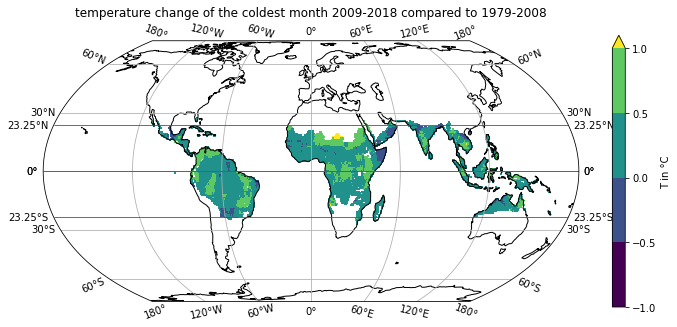

In [5]:
#plotting the difference in the tropics temperature
trop_diff = tropics10-tropics.sel(time=slice("1979-01-01T00:00:00.000000000", "2009-01-01T00:00:00.000000000"))

ax = plt.axes(projection = ccrs.EqualEarth())
trop_diff.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'viridis', 
               levels = [-1, -0.5, 0, 0.5, 1], cbar_kwargs = {'label':'T in °C'})
plt.title('temperature change of the coldest month 2009-2018 compared to 1979-2008')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('warming_coldest_month.jpeg')


In [6]:
#temperature change overall
#temperature data
t2m = ds_tmp.t2m

# monthly average temperature
t_month_avg = t2m.groupby('time.month').mean()
t_min = t_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics = t_month_avg.where(t_min >= 18)
tropics_mean = tropics.mean(dim = 'month')
tropics_mean = tropics_mean.where(nc_inv.lsm > 0.5)

#last ten years
ds_tmp_10 = t2m.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
# monthly average temperature
t10_month_avg = ds_tmp_10.groupby('time.month').mean()
t10_min = t10_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics10 = t10_month_avg.where(t_min >= 18)
tropics10_mean = tropics10.mean(dim = 'month')
tropics10_mean = tropics10_mean.where(nc_inv.lsm > 0.5)


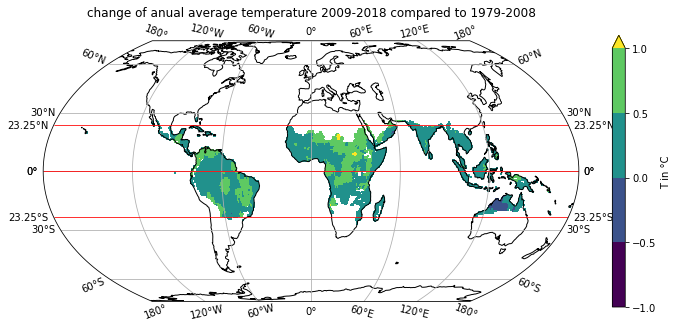

In [7]:
#plotting the difference in the tropics temperature
trop_mean_diff = tropics10_mean-tropics_mean.sel(time=slice("1979-01-01T00:00:00.000000000", "2009-01-01T00:00:00.000000000"))

ax = plt.axes(projection = ccrs.EqualEarth())
trop_mean_diff.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'viridis', 
                    levels = [-1, -0.5, 0, 0.5, 1], cbar_kwargs = {'label':'T in °C'})
plt.title('change of anual average temperature 2009-2018 compared to 1979-2008')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('tropics_warming.jpeg')

In [8]:
#expansion of the tropics
#tropics before 2009

t2m = ds_tmp.t2m
t2m_early = t2m.sel(time=slice("1979-01-01T00:00:00.000000000", "2009-01-01T00:00:00.000000000"))

# monthly average temperature
t_early_month_avg = t2m_early.groupby('time.month').mean()
t_min_early = t_early_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics_early = t_min_early.where(t_min_early >= 18)


#tropics 2009 - 2018

t2m_late = t2m.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))

# monthly average temperature
t_late_month_avg = t2m_late.groupby('time.month').mean()
t_min_late = t_late_month_avg.min(dim='month') - 273.15
#tropics are defined as areas with a min average T of 18°C in the coldest month
tropics_late = t_min_late.where(t_min_late >= 18)

tropics_new = tropics_late.where(t_min_early < 18)
tropics_new = tropics_new.where(nc_inv.lsm > 0.5)


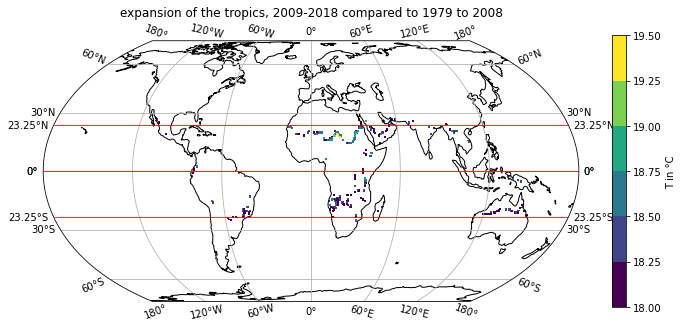

In [9]:
#plotting the expansion of the tropics
ax = plt.axes(projection = ccrs.EqualEarth())
tropics_new.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'viridis', 
            levels = [18, 18.25, 18.5, 18.75, 19, 19.25, 19.5], cbar_kwargs = {'label':'T in °C'})
plt.title('expansion of the tropics, 2009-2018 compared to 1979 to 2008')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('tropics_expansion.jpeg')

In [10]:
#changes in precipitation
#precipitation data

ds_p_early = ds_p.sel(time=slice("1979-01-01T00:00:00.000000000", "2009-01-01T00:00:00.000000000"))
p_early_mon_avg = ds_p_early.tp.groupby('time.month').mean() * 1000 * 30
p_early_min = p_early_mon_avg.min(dim = 'month')

#last ten years
ds_p_10 = ds_p.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
#ds_p_10.transpose('time', 'latitude', 'longitude')
p10_mon_avg = ds_p_10.tp.groupby('time.month').mean() * 1000 * 30
p10_min = p10_mon_avg.min(dim = 'month')

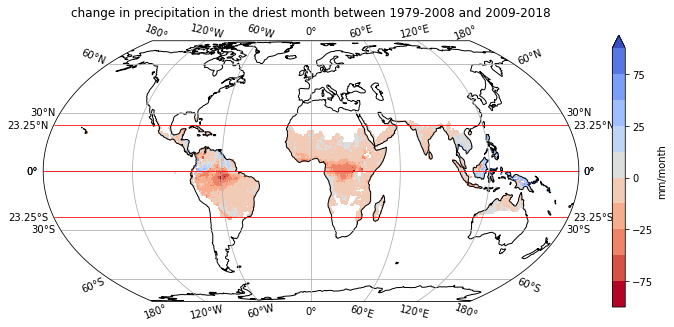

In [11]:
#change in overall precipitation
p_diff = p10_min - p_early_min
p_diff = p_diff.where(t_min >= 18)
p_diff = p_diff.where(nc_inv.lsm > 0.5)
#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
p_diff.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'coolwarm_r', 
            levels = [-100, -75, -50, -25, -10, 0, 10, 25, 50 ,75, 100], cbar_kwargs = {'label':'mm/month'})
plt.title('change in precipitation in the driest month between 1979-2008 and 2009-2018')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('driest_month_change.jpeg')

In [12]:
#change in precipitation overall
ds_p_early = ds_p.sel(time=slice("1979-01-01T00:00:00.000000000", "2009-01-01T00:00:00.000000000"))
p_early_mon_avg = ds_p_early.tp.groupby('time.month').mean() * 1000 * 30
p_early_mean = p_early_mon_avg.mean(dim = 'month')

#last ten years
ds_p_10 = ds_p.sel(time=slice("2009-01-01T00:00:00.000000000", "2019-01-01T00:00:00.000000000"))
#ds_p_10.transpose('time', 'latitude', 'longitude')
p10_mon_avg = ds_p_10.tp.groupby('time.month').mean() * 1000 * 30
p10_mean = p10_mon_avg.mean(dim = 'month')

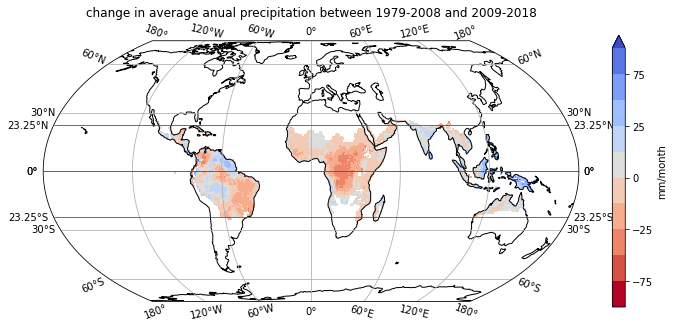

In [13]:
#change in overall precipitation
p_diff = p10_mean - p_early_mean
p_mean_diff = p_diff.where(t_min >= 18)
p_mean_diff = p_mean_diff.where(nc_inv.lsm > 0.5)
#plotting
ax = plt.axes(projection = ccrs.EqualEarth())
p_mean_diff.plot(ax = ax, transform = ccrs.PlateCarree(), cmap = 'coolwarm_r', 
            levels = [-100, -75, -50, -25, -10, 0, 10, 25, 50 ,75, 100], cbar_kwargs = {'label':'mm/month'})
plt.title('change in average anual precipitation between 1979-2008 and 2009-2018')
ax.coastlines(); grid = ax.gridlines(draw_labels = True);
grid1 = ax.gridlines(color = 'red', draw_labels = True);
grid1.ylocator = mticker.FixedLocator([-23.25, 0, 23.25]);
grid1.xlocator = mticker.FixedLocator([]);
plt.savefig('precip_change.jpeg')